In [6]:
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt


xs = np.arange(10,100,1.)
ys = 1.*xs
zs = 0.*xs
xs += np.random.normal(size=len(xs),scale=10.)
ys += np.random.normal(size=len(ys),scale=10.)
zs += np.random.normal(size=len(zs),scale=10.)

kk = xs > -1000.

from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components)
M = np.array( [xs[kk], ys[kk], zs[kk]]).T
pca.fit( M )


print(pca.explained_variance_ratio_)
print(pca.singular_values_)

print(pca.components_[0] , pca.components_[1] , pca.components_[2] )

from astropy.stats import biweight_location, biweight_midvariance

ranges = []
kappa = 2.
for i in range(n_components):
    
    P = M.dot( pca.components_[i] )
    x, dx = biweight_location(P), np.sqrt((biweight_midvariance(P)))
    vmin, vmax = np.min(P), np.max(P)
    print("c {:.2f}: min = {:.2f} max = {:.2f} biweight_loc = {:.2f} biweight_midvariance = {:.2f}".format(i, vmin, vmax, x, dx) )
    ranges.append( [x-kappa*dx, x+kappa*dx])

[0.87583658 0.07169803 0.05246538]
[359.7221436  102.92224633  88.04243645]
[-0.70975908 -0.70421732 -0.01788924] [ 0.3927774  -0.37453203 -0.83991171] [-0.58478027  0.60316145 -0.54242815]
c 0.00: min = -145.91 max = 0.13 biweight_loc = -77.20 biweight_midvariance = 39.29
c 1.00: min = -19.92 max = 29.69 biweight_loc = 0.99 biweight_midvariance = 11.30
c 2.00: min = -18.71 max = 23.87 biweight_loc = 1.69 biweight_midvariance = 9.50


(-23.377899356441713,
 122.06745257468803,
 -21.849128739815598,
 116.42447552155522)

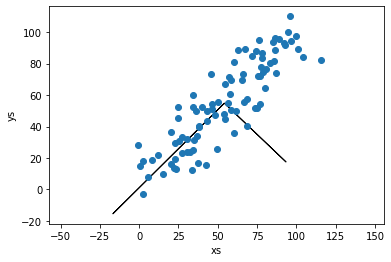

In [27]:
plt.plot(xs[kk],ys[kk],'o')
plt.arrow( np.mean(xs[kk]),np.mean(ys[kk]), pca.components_[0][0]*100, pca.components_[0][1]*100 )
plt.arrow( np.mean(xs[kk]),np.mean(ys[kk]), pca.components_[1][0]*100, pca.components_[1][1]*100 )
plt.xlabel("xs")
plt.ylabel("ys")
plt.axis('equal')

In [18]:
plt.arrow?